In [83]:
!pip install nbconvert

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [85]:
%cd '/content/drive/My Drive/Colab Notebooks'


/content/drive/My Drive/Colab Notebooks


In [87]:
!jupyter nbconvert --to html Lok_Sabha.ipynb


[NbConvertApp] Converting notebook Lok_Sabha.ipynb to html
[NbConvertApp] Writing 1112182 bytes to Lok_Sabha.html


In [82]:
pip install requests beautifulsoup4 pandas


In [8]:
from bs4 import BeautifulSoup
BeautifulSoup

bs4.BeautifulSoup

In [21]:
import urllib
html = urllib.request.urlopen('https://results.eci.gov.in/PcResultGenJune2024/index.htm')
content = html.readlines()
content

[b'<!doctype html>\r\n',
 b'<html lang="en">\r\n',
 b'\r\n',
 b'<head>\r\n',
 b'  <!-- Required meta tags -->\r\n',
 b'  <meta charset="utf-8"> \r\n',
 b'    <meta name="viewport" content="width=device-width, initial-scale=1"> \r\n',
 b"    <meta http-equiv='Content-Type' content='text/html; charset=UTF-8'>\r\n",
 b"    <meta http-equiv='X-UA-Compatible' content='IE=7'>\r\n",
 b"    <meta http-equiv='Cache-Control' content='no-cache, no-store, must-revalidate'>\r\n",
 b"    <meta http-equiv='Pragma' content='no-cache'>\r\n",
 b"    <meta http-equiv='Expires' content='0'>\r\n",
 b"    <meta http-equiv='refresh' content='300'>\r\n",
 b'  <!-- Bootstrap CSS -->\r\n',
 b'  <link href="css/bootstrap.min.css" rel="stylesheet">\r\n',
 b'  <link href="css/custom.css" rel="stylesheet">\r\n',
 b'  <link href="css/responsive.css" rel="stylesheet">\r\n',
 b'  <link href="css/font.css" rel="stylesheet">\r\n',
 b'  <link rel=\'shortcut icon\' href=\'img/icons/favicon.ico\' type="image/x-icon">\r\n',

In [22]:
html = urllib.request.urlopen('https://results.eci.gov.in/PcResultGenJune2024/index.htm')
bs_obj = BeautifulSoup(html.read(),"lxml")
bs_obj

<!DOCTYPE html>
<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<style type="text/css">
</style>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_conf

In [23]:
len(bs_obj.find_all('table'))

1

In [24]:
bs_obj.title

<title>Election Commission of India</title>

In [25]:
links = bs_obj.find_all('div')
print(links[0])
print(links[0].get('id'))

<div class="logo-search">
<div class="mob-btn"><img alt="" src="img/icons/menu.png"/></div>
<div class="logo"><a href="index.htm"><img alt="" src="img/eci-logo.png"/></a></div>
<div class="lft-menu">
<ul>
<li><a href="index.htm"><span><img alt="" src="img/icons/home.png"/></span> Home</a></li>
<li><a href="hi/index.htm">Hindi <span><img alt="" src="img/icons/language.png"/></span></a></li>
<!-- <li><a href=''>Search <span><img src='img/icons/search.png' alt=''></span></a></li> -->
<li><a href="" onclick="window.location.href=window.location.href">Refresh <span><img alt="" src="img/icons/refresh.png"/></span></a></li>
<li><img alt="" src="img/deshgarv-logo.png"/></li>
</ul>
</div>
</div>
None


In [26]:
links = bs_obj.find_all('img')
print(links[0])

<img alt="" src="img/icons/menu.png"/>


In [27]:
links[0].get('src')

'img/icons/menu.png'

In [29]:
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
from IPython.display import Image
Image(url = url+'/'+links[0].get('src'))

In [30]:
url = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm'
user_agent = 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)'
q = urllib.request.Request(url)
q.add_header('User.Agent',user_agent)
bs_obj = BeautifulSoup(urllib.request.urlopen(q).read(),'lxml')

In [32]:
table_obj = bs_obj.find_all('table')[0]
table_obj

<table class="table">
<thead>
<tr>
<th style="text-align: left;">Party</th>
<th style="text-align:right">Won</th>
<th style="text-align:right">Leading</th>
<th style="text-align:right">Total</th>
</tr>
</thead>
<tbody>
<tr class="tr">
<td style="text-align:left">Bharatiya Janata Party - BJP</td>
<td style="text-align:right">
<a href="partywisewinresultState-369.htm">240</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                                    </td>
<td style="text-align:right">240</td>
</tr>
<tr class="tr">
<td style="text-align:left">Indian National Congress - INC</td>
<td style="text-align:right">
<a href="partywisewinresultState-742.htm">99</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                              

In [33]:
for th in table_obj.find_all('tr')[0]:
  try:
    print(th.text)
  except AttributeError:
    continue



Party


Won


Leading


Total




In [35]:
row_values =[]
for td in table_obj.find_all('tr')[0]:
  try:
    row_values.append(td.text)
  except AttributeError:
    continue
row_values

['\n', 'Party', '\n', 'Won', '\n', 'Leading', '\n', 'Total', '\n']

In [48]:
col_names = []
for th in table_obj.find_all('tr')[0]:
  try:
    col_names.append(th.text)
  except AttributeError:
    continue

In [51]:
data_array =[]
for table_row in table_obj.find_all('tr')[1:]:
  row_values = []
  for td in table_row:
    try:
      row_values.append(td.text)
    except AttributeError:
      continue
  data_array.append(row_values)
data_array

[['\n',
  'Bharatiya Janata Party - BJP',
  '\n',
  '\n240\n',
  '\n',
  '\r\n                                                                                        0\r\n                                                                                    ',
  '\n',
  '240',
  '\n'],
 ['\n',
  'Indian National Congress - INC',
  '\n',
  '\n99\n',
  '\n',
  '\r\n                                                                                        0\r\n                                                                                    ',
  '\n',
  '99',
  '\n'],
 ['\n',
  'Samajwadi Party - SP',
  '\n',
  '\n37\n',
  '\n',
  '\r\n                                                                                        0\r\n                                                                                    ',
  '\n',
  '37',
  '\n'],
 ['\n',
  'All India Trinamool Congress - AITC',
  '\n',
  '\n29\n',
  '\n',
  '\r\n                                                                          

In [53]:
data_df = pd.DataFrame(data_array , columns = col_names)
data_df.head()

,\n,Party,\n,Won,\n,Leading,\n,Total,\n
0,\n,Bharatiya Janata Party - BJP,\n,\n240\n,\n,\r\n ...,\n,240,\n
1,\n,Indian National Congress - INC,\n,\n99\n,\n,\r\n ...,\n,99,\n
2,\n,Samajwadi Party - SP,\n,\n37\n,\n,\r\n ...,\n,37,\n
3,\n,All India Trinamool Congress - AITC,\n,\n29\n,\n,\r\n ...,\n,29,\n
4,\n,Dravida Munnetra Kazhagam - DMK,\n,\n22\n,\n,\r\n ...,\n,22,\n


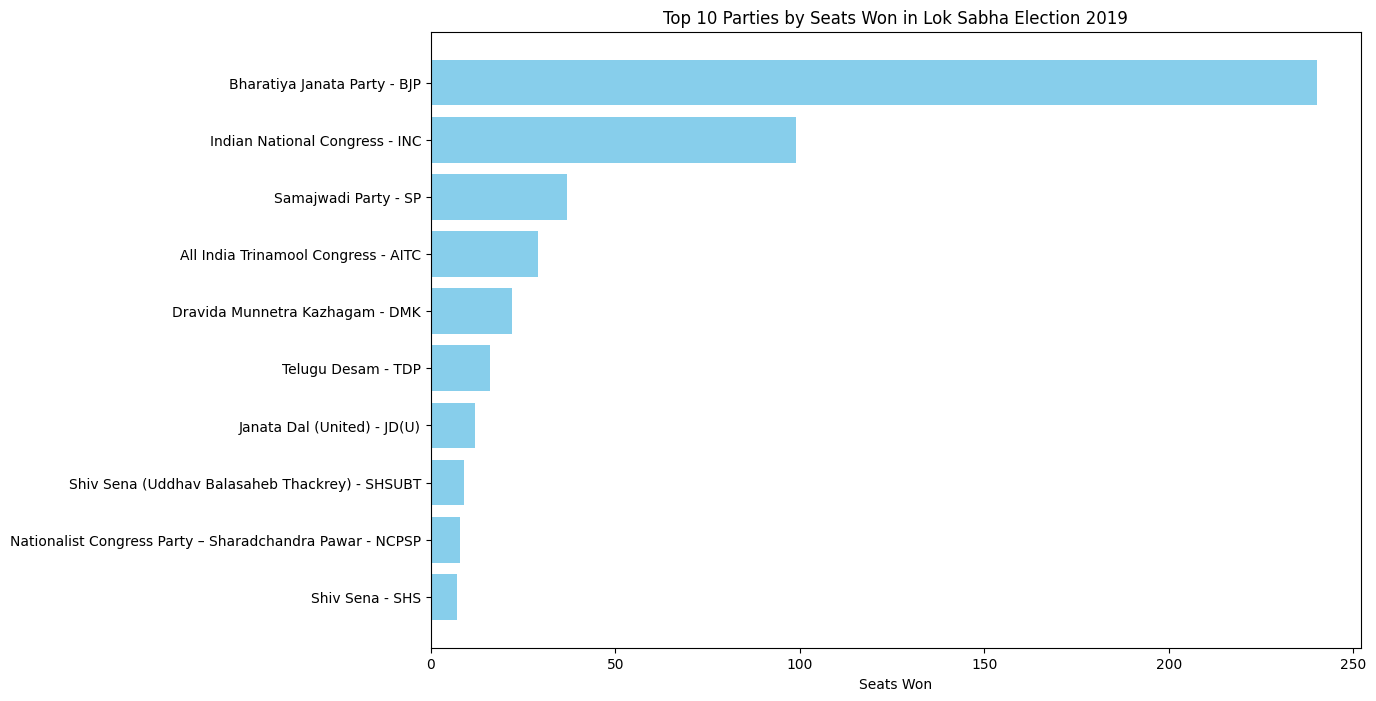

Top 10 Parties by Seats Won:
                                               Party  Won
0                       Bharatiya Janata Party - BJP  240
1                     Indian National Congress - INC   99
2                               Samajwadi Party - SP   37
3                All India Trinamool Congress - AITC   29
4                    Dravida Munnetra Kazhagam - DMK   22
5                                 Telugu Desam - TDP   16
6                        Janata Dal (United) - JD(U)   12
7     Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    9
8  Nationalist Congress Party – Sharadchandra Paw...    8
9                                    Shiv Sena - SHS    7


In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file into a pandas DataFrame
file_path = '/content/Lok_sabha.csv'
df = pd.read_csv(file_path)

# Sorting the DataFrame by 'Won' in descending order
df_sorted = df.sort_values(by='Won', ascending=False)

# Plotting the top 10 parties by seats won
plt.figure(figsize=(12, 8))
plt.barh(df_sorted['Party'].head(10), df_sorted['Won'].head(10), color='skyblue')
plt.xlabel('Seats Won')
plt.title('Top 10 Parties by Seats Won in Lok Sabha Election 2019')
plt.gca().invert_yaxis()  # Invert y-axis to show highest seats at the top
plt.show()

# Print the top 10 parties and their seats won
print("Top 10 Parties by Seats Won:")
print(df_sorted[['Party', 'Won']].head(10))

# Additional insights can be derived programmatically based on the data structure and requirements.


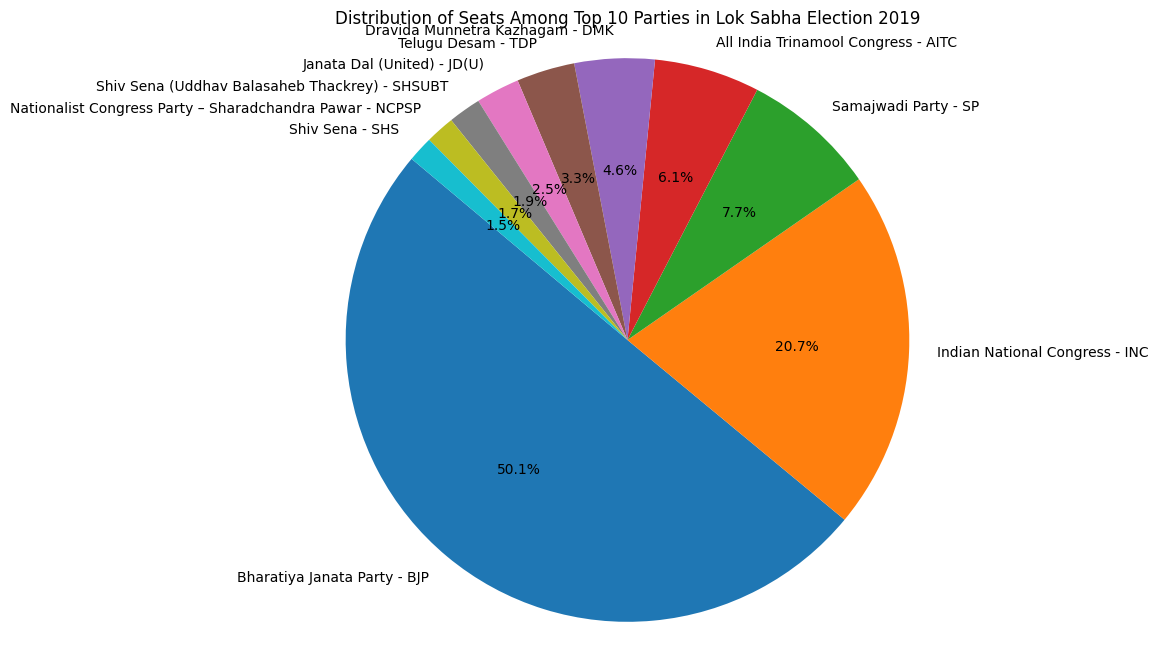

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file into a pandas DataFrame
file_path = '/content/Lok_sabha.csv'
df = pd.read_csv(file_path)

# Sorting the DataFrame by 'Won' in descending order
df_sorted = df.sort_values(by='Won', ascending=False)

# Selecting top 10 parties by seats won
top_10_parties = df_sorted.head(10)

# Plotting a pie chart for the distribution of seats among top 10 parties
plt.figure(figsize=(8, 8))  # Adjust figure size if necessary
plt.pie(top_10_parties['Won'], labels=top_10_parties['Party'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Seats Among Top 10 Parties in Lok Sabha Election 2019')
plt.show()


In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already read the data into a DataFrame df

# Function to find a party's details
def party_details(party_name):
    party_info = df[df['Party'].str.contains(party_name, case=False)]
    if not party_info.empty:
        return party_info.iloc[0]
    return None

# Dominance of BJP
bjp_info = party_details('Bharatiya Janata Party')
if bjp_info is not None:
    print(f"Dominance of BJP: {bjp_info['Party']} has a significant lead with {bjp_info['Won']} seats out of {bjp_info['Total']}, indicating a strong electoral performance.")
else:
    print("BJP information not found.")





Dominance of BJP: Bharatiya Janata Party - BJP has a significant lead with 240 seats out of 240, indicating a strong electoral performance.


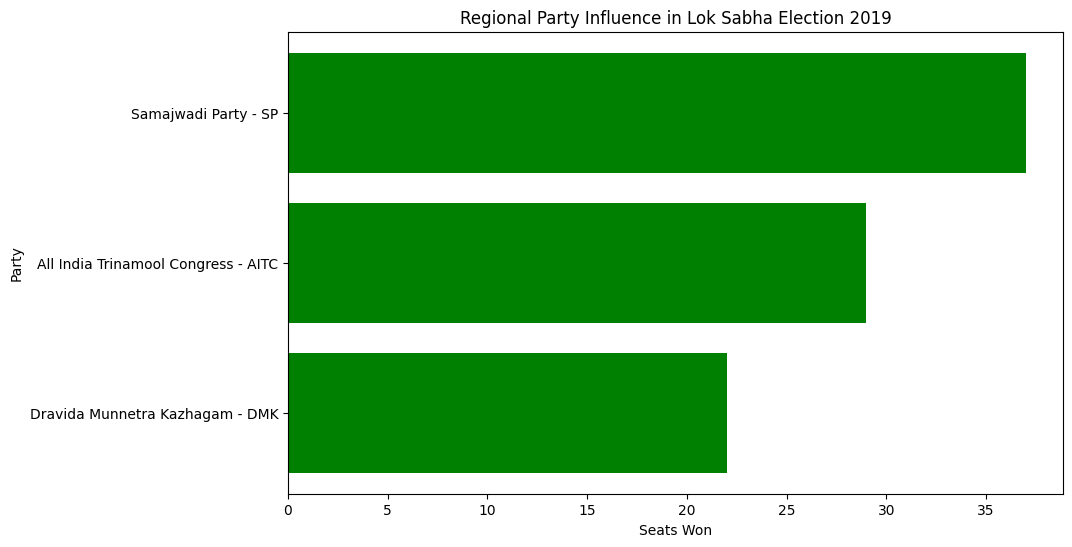

In [65]:
# Plotting Regional Party Influence
if regional_party_data:
    plt.figure(figsize=(10, 6))
    parties, seats = zip(*regional_party_data)
    plt.barh(parties, seats, color='green')
    plt.xlabel('Seats Won')
    plt.ylabel('Party')
    plt.title('Regional Party Influence in Lok Sabha Election 2019')
    plt.gca().invert_yaxis()
    plt.show()

In [63]:
# Regional Party Influence
regional_parties = ['Samajwadi Party', 'All India Trinamool Congress', 'Dravida Munnetra Kazhagam']
regional_party_data = []
for party_name in regional_parties:
    party_info = party_details(party_name)
    if party_info is not None:
        print(f"Regional Party Influence: {party_info['Party']} holds {party_info['Won']} seats, indicating their regional electoral strength.")
        regional_party_data.append((party_info['Party'], party_info['Won']))


Regional Party Influence: Samajwadi Party - SP holds 37 seats, indicating their regional electoral strength.
Regional Party Influence: All India Trinamool Congress - AITC holds 29 seats, indicating their regional electoral strength.
Regional Party Influence: Dravida Munnetra Kazhagam - DMK holds 22 seats, indicating their regional electoral strength.


In [62]:
# Congress as the Primary Opposition
congress_info = party_details('Indian National Congress')
if congress_info is not None:
    print(f"Congress as the Primary Opposition: {congress_info['Party']} is the closest competitor with {congress_info['Won']} seats, highlighting its position as the principal opposition party.")
else:
    print("Congress information not found.")

Congress as the Primary Opposition: Indian National Congress - INC is the closest competitor with 99 seats, highlighting its position as the principal opposition party.


In [66]:
# Variety of Political Representation
total_parties = len(df) - 1  # Excluding 'Total' row
print(f"Variety of Political Representation: The data shows representation from {total_parties} parties, demonstrating the multi-party nature of Indian politics.")


Variety of Political Representation: The data shows representation from 39 parties, demonstrating the multi-party nature of Indian politics.


In [67]:
# Regional Concentrations
regional_parties = ['Telugu Desam', 'Shiv Sena']
regional_party_data = []
for party_name in regional_parties:
    party_info = party_details(party_name)
    if party_info is not None:
        print(f"Regional Concentrations: {party_info['Party']} has significant representation from specific states, reflecting regional political dynamics.")
        regional_party_data.append((party_info['Party'], party_info['Won']))


Regional Concentrations: Telugu Desam - TDP has significant representation from specific states, reflecting regional political dynamics.
Regional Concentrations: Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT has significant representation from specific states, reflecting regional political dynamics.


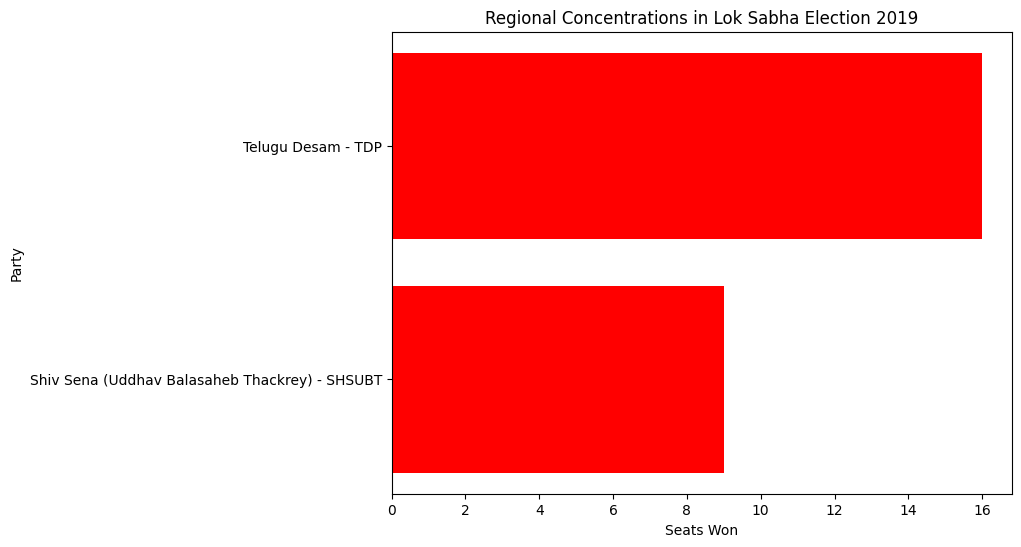

In [70]:

# Plotting Regional Concentrations
if regional_party_data:
    plt.figure(figsize=(8, 6))
    parties, seats = zip(*regional_party_data)
    plt.barh(parties, seats, color='red')
    plt.xlabel('Seats Won')
    plt.ylabel('Party')
    plt.title('Regional Concentrations in Lok Sabha Election 2019')
    plt.gca().invert_yaxis()
    plt.show()

In [71]:
# Minority and Special Interest Parties
special_interest_parties = ['Indian Union Muslim League']
for party_name in special_interest_parties:
    party_info = party_details(party_name)
    if party_info is not None:
        print(f"Minority and Special Interest Parties: {party_info['Party']} is represented in the Lok Sabha.")

Minority and Special Interest Parties: Indian Union Muslim League - IUML is represented in the Lok Sabha.


In [72]:
# Emergence of New Parties
new_parties = ['Aam Aadmi Party', 'Yuvajana Sramika Rythu Congress Party']
new_party_data = []
for party_name in new_parties:
    party_info = party_details(party_name)
    if party_info is not None:
        print(f"Emergence of New Parties: {party_info['Party']} has gained traction, indicating shifts in political preferences.")
        new_party_data.append((party_info['Party'], party_info['Won']))

Emergence of New Parties: Aam Aadmi Party - AAAP has gained traction, indicating shifts in political preferences.
Emergence of New Parties: Yuvajana Sramika Rythu Congress Party - YSRCP has gained traction, indicating shifts in political preferences.


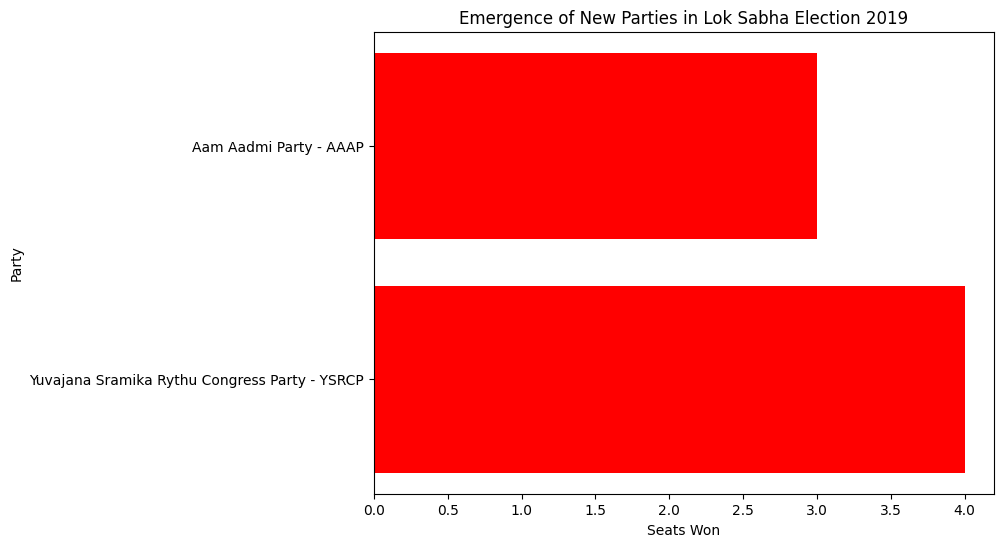

In [74]:
# Plotting Emergence of New Parties
if new_party_data:
    plt.figure(figsize=(8, 6))
    parties, seats = zip(*new_party_data)
    plt.barh(parties, seats, color='red')
    plt.xlabel('Seats Won')
    plt.ylabel('Party')
    plt.title('Emergence of New Parties in Lok Sabha Election 2019')
    plt.gca().invert_yaxis()
    plt.show()


In [76]:


# Impact of Coalition Politics
coalition_parties = df[(df['Won'] < 10) & (~df['Party'].str.contains('Total'))]
if not coalition_parties.empty:
    coalition_total_seats = coalition_parties['Won'].sum()
    print(f"Impact of Coalition Politics: Smaller parties and independents collectively hold {coalition_total_seats} seats, suggesting the potential influence of coalition politics in forming government alliances.")
print('\n\n\n')
# Decentralized Support
single_digit_parties = df[df['Won'] < 10]
if not single_digit_parties.empty:
    print(f"Decentralized Support: Several parties have won seats in single digits, underscoring decentralized political support across the country.")
print('\n\n\n')


Impact of Coalition Politics: Smaller parties and independents collectively hold 80 seats, suggesting the potential influence of coalition politics in forming government alliances.




Decentralized Support: Several parties have won seats in single digits, underscoring decentralized political support across the country.




